# NLP AS1--Regex

Richard Yang

### Instructions:

You are working on a project to promote the food safety in Chicago.  Your goal is to identify the top-10 most frequent causes of failed food inspections in Chicago and effectively present them to your boss. CSV file is available here:  https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5Links to an external site.

1. Select only the records corresponding to failed inspection (see "results" column)
2. Clean the data, making sure that there are no NaNs in "violations" column
3. "Violations" column lists the reasons for inspection failure. Those reasons are separated by "|".  Each reason consists of a regulation code, regulation description, and comments describing how the regulation was violated. 
4. Using regular expression, parse "violations" column to select only regulation descriptions, no code or comments
5. Count how many times each regulation description occurred in the table and visualize top-10 the most frequent regulation descriptions
6. Identify whether any of these restaurants are repeat offenders (explore a combination of License; Business Name and Address variables to determine what is the best way to uniquely identify a business) and whether the violations are the same or different for these repeat offenses
7. Review the restaurants "Out of Business", is there an extended history of prior violations for these closed businesses?
8. Food inspection data has 10+ years of history, do you see any changing trends in most common violations?  Plot the results for top-5 most frequent violations over time
9. Your final output should be a Jupyter notebook showing all your code and the results so that one can easily reproduce them 

Remember: you are presenting it to your boss and have very limited amount of time to state your case. Your presentation (charts and explanations within Jupyter notebook) should be as clear and short as possible but complete.
Rules and requirements:

Your final output and the code should be contained within Jupyter Notebook (ipynb)

In [2]:
import pandas as pd
import regex as re
import regex as re
import collections
df_raw = pd.read_csv('Food_Inspections.csv')
df_raw.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563767,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,09/15/2022,Non-Inspection,No Entry,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"
1,2563480,FINKI ELEMENTARY ACADEMY,FINKI ELEMENTARY ACADEMY,23541.0,School,Risk 1 (High),2332 S Western (2400W),CHICAGO,IL,60608.0,09/12/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2563279,SH GRILL,SH GRILL,2863054.0,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
3,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2560592,PROVARE CHICAGO,PROVARE CHICAGO,2796734.0,Restaurant,Risk 1 (High),1421 W CHICAGO AVE,CHICAGO,IL,60642.0,07/12/2022,Canvass,Pass,NaN,41.896025,-87.663272,"(41.89602502708334, -87.66327229348566)"


## Q1-Q3

In [316]:
# Select only the records corresponding to failed inspection in Results column

df_fail = df_raw.loc[df_raw['Results'] == 'Fail']

# Clean the data, making sure that there are no NaNs in "Violations" column
df_fail.dropna(subset=['Violations'], inplace=True)

print(df_fail['Violations'].head(1))

36    3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: 2-102.14(O) OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. | 5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: 2-501.11 OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 6-301.14 OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. | 21. PROPER HOT HOLDING TEMPERATURES - Comments: 3-501.16(A:1) OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT

C:\Users\Richa\AppData\Local\Temp\ipykernel_26352\4290374652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail.dropna(subset=['Violations'], inplace=True)


## Q4

In [317]:
# "Violations" column lists the reasons for inspection failure. Those reasons are separated by "|".  Each reason consists of a regulation code, regulation description, and comments describing how the regulation was violated. Using regular expression, parse "Violations" column to select only regulation descriptions, no code or comments

import regex as re
df=df_fail.copy()


df['Violations'] = df['Violations'].astype(str)


df['Violations'] = '| ' + df['Violations'].astype(str) 

df['Violations_new']= df['Violations'].apply(lambda x: re.findall(r"\|\s*\d+\.\s*(.*?)\s*(?=\|\s*\d+\.\s*|-\s*Comments)", x))

df['Violations_new'].iloc[0]


['MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING',
 'PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'PROPER HOT HOLDING TEMPERATURES',
 'PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL',
 'THERMOMETERS PROVIDED & ACCURATE',
 'FOOD PROPERLY LABELED; ORIGINAL CONTAINER',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'SINGLE-USE/SINGLE-SERVICE ARTICLES: PROPERLY STORED & USED',
 'NON-FOOD/FOOD CONTACT SURFACES CLEAN',
 'PLUMBING INSTALLED; PROPER BACKFLOW DEVICES',
 'TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED',
 'GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING',
 

## Q5

Count how many times each regulation description occurred in the table and visualize top-10 the most frequent regulation descriptions


In [318]:
from collections import Counter
count  = Counter()
for i in df['Violations_new']:
    count.update(i)

top10 = count.most_common(10)

# create a dataframe for the top10 violations

top10_df = pd.DataFrame(top10, columns = ['Violation', 'Count'])

top10_df


,Violation,Count
0,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",19370
1,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",18255
2,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",16445
3,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS",16431
4,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",15867
5,VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED,15522
6,"FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED",15019
7,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING EQUIPMENT PROPERLY STORED",10656
8,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",8658
9,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE,8314


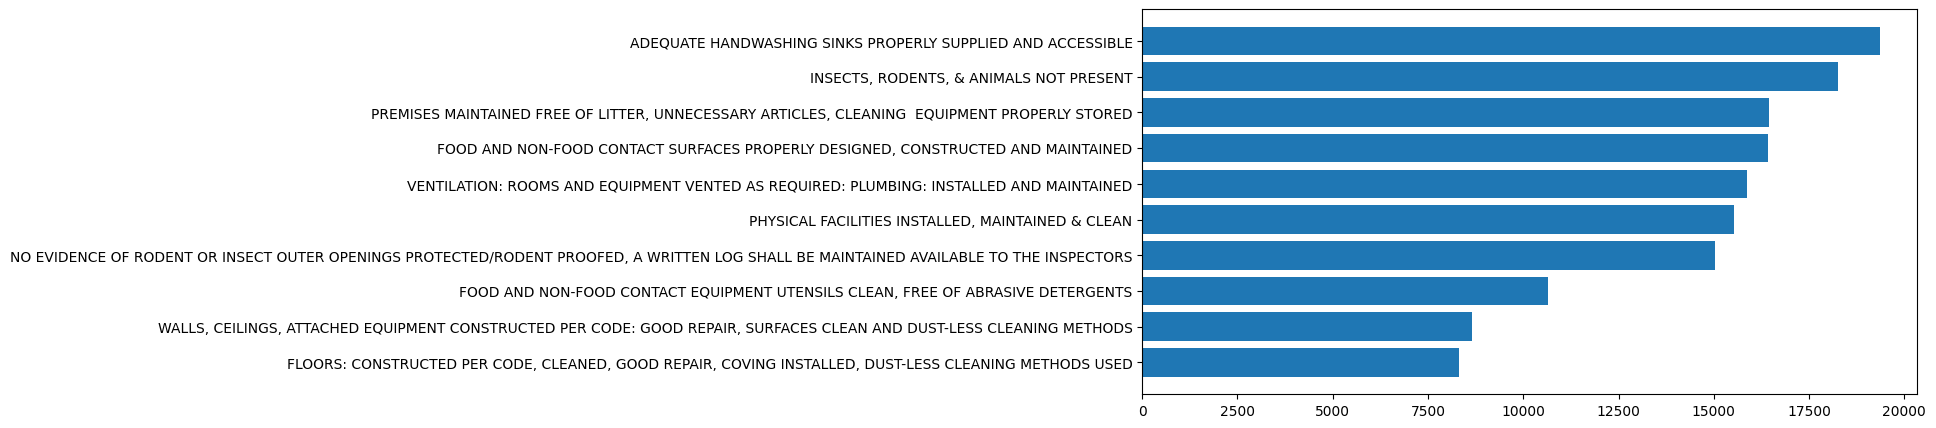

In [319]:
# Generate a bar plot for the top-10 violations
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.barh(top10_df['Violation'], sorted(top10_df['Count']))
plt.show()

In [320]:
pd.set_option('display.max_colwidth', None)
df1 = df.copy()
df1 = df1.drop(['Violations'], axis=1)


## Q6
Identify whether any of these restaurants are repeat offenders (explore a combination of License; Business Name and Address variables to determine what is the best way to uniquely identify a business) and whether the violations are the same or different for these repeat offense

In [321]:
df1.dropna(subset=['License #'], inplace=True)
df1['License #'] = df1['License #'].astype(int)

df2 = df1[['DBA Name', 'Address', 'License #','Inspection Date']].groupby(by=['DBA Name', 'Address']).count()
df2 = df2.rename(columns={'Inspection Date': 'Count_Inspection'})
df2.head(3)

# filter offenders that have more than one offense in inspection
Repeated_Offender = df2[df2['Count_Inspection'] > 1]

# convert multi-index to dataframe
Repeated_Offender = Repeated_Offender.reset_index()

Repeated_Offender

## Therefore, there are some restaurants are repeat offerders which have more than one offense in inspection.

,DBA Name,Address,License #,Count_Inspection
0,#1 CHOP SUEY,1907 W 87TH ST,3,3
1,#1 CHOP SUEY,4307 W IRVING PARK RD,5,5
2,#1 WOK N ROLL,1408 E 53RD ST,5,5
3,1 N WACKER KITCHEN AND BAR,1 N WACKER DR,3,3
4,"1,200 SQ.FT. - YEMEN RESTAURANT, INC.",4748 N KENNETH AVE,3,3
...,...,...,...,...
10423,Zoku Sushi,1616 N KEDZIE AVE,2,2
10424,bopNgrill,921 W BELMONT AVE,2,2
10425,rendezvous bistro,2656 W Lawrence AVE,2,2
10426,stockton,4425 N Magnolia AVE,3,3


In [322]:
# I choose to use License #, DBA Name, Address to identify unqique business
dff_rep_offender = df[['License #','DBA Name','Address','Inspection Date','Violations_new']]
dff_rep_offender['violation_set'] = dff_rep_offender['Violations_new'].apply(lambda x: list(set(x)))

# # of repeated violations 
dff_rep_offender2 = dff_rep_offender.groupby(['License #','DBA Name','Address']).agg({'violation_set':lambda x: list(x)}).reset_index()
df_repeated = dff_rep_offender2[dff_rep_offender2['violation_set'].apply(lambda x: len(x) >1)].reset_index().drop('index',axis=1)
df_repeated.shape

C:\Users\Richa\AppData\Local\Temp\ipykernel_26352\1346220688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_rep_offender['violation_set'] = dff_rep_offender['Violations_new'].apply(lambda x: list(set(x)))


(10287, 4)

In [323]:
# combine unique violations for each business
dff_rep_offender = dff_rep_offender.groupby(['License #','DBA Name','Address']).agg({'violation_set':'sum'}).reset_index()
df_rp_merged = df_repeated.merge(dff_rep_offender,how='left',on=['License #','DBA Name','Address'])


In [324]:
dff_rep_offender.shape

(21050, 4)

In [325]:
df_rp_merged.shape

(10287, 5)

In [326]:
df_rp_merged.drop(['violation_set_x'],axis=1,inplace=True)
# repeat offenders specific count for whether have repeated prior violations
df_rp_merged['violation_unique'] = df_rp_merged['violation_set_y'].apply(lambda x: list(set(x)))
df_rp_merged['repeat'] = df_rp_merged.apply(lambda row:Counter(row['violation_set_y']) != Counter(row['violation_unique']),axis=1)
df_rp_merged['repeat'].value_counts()

True     8798
False    1489
Name: repeat, dtype: int64

There are 10287 restaurants which had repeated offerders.

Among them, there are 8798 restaurants which had some repeated violations while 1489 restaurants had no repeated violations. 

Therefore, for those repeat offenders, violations tends to be the same.

## Q7

Review the restaurants "Out of Business", is there an extended history of prior violations for these closed businesses?

In [327]:
OutOfBusiness = df_raw[df_raw['Results'] == 'Out of Business']
OutOfBusiness.head(1)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
5,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN


In [328]:
OutOfBusiness.shape

(21485, 17)

In [329]:
OutofBusiness2 = OutOfBusiness[['DBA Name', 'Address', 'License #']]
OutofBusiness2.head(2)

,DBA Name,Address,License #
5,CHARTWELLS,2911 W W 47TH ST,2549059.0
20,7-ELEVEN #24606,2600 N LINCOLN AVE,12892.0


In [330]:
# obtain unique prior violations for each out-of-business restaurant
OTB = df[['License #','DBA Name','Address','Inspection Date','Violations_new']]
OTB['violation_countset'] = OTB['Violations_new'].apply(lambda x: list(set(x)))
OTB_all = OutofBusiness2.merge(OTB,on=['License #','DBA Name','Address'],how='left')
OTB_all.head(1)

C:\Users\Richa\AppData\Local\Temp\ipykernel_26352\1767943677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OTB['violation_countset'] = OTB['Violations_new'].apply(lambda x: list(set(x)))


,DBA Name,Address,License #,Inspection Date,Violations_new,violation_countset
0,CHARTWELLS,2911 W W 47TH ST,2549059.0,03/30/2022,"[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED, WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS, NON-FOOD/FOOD CONTACT SURFACES CLEAN, PLUMBING INSTALLED; PROPER BACKFLOW DEVICES, GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN]","[FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED, PLUMBING INSTALLED; PROPER BACKFLOW DEVICES, GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN, NON-FOOD/FOOD CONTACT SURFACES CLEAN, WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE]"


In [331]:
# count the # of inspection
OTB_all2 = OTB_all.groupby(["License #", "DBA Name", "Address"]).agg({'violation_countset': ['count', 'sum']}).reset_index()

OTB_all2['prior_violations'] = OTB_all2['violation_countset']['sum'].apply(lambda x: False if x==0 else True)
OTB_all2.head(3)

License #                  DBA Name                 Address  \
                                                                
0       0.0             ALTHEA BY MKC     700 N MICHIGAN AVE    
1       0.0  BABAS STEAK AND LEMONADE  3407 1/2 W MADISON ST    
2       0.0            BAR RISTA CAFE    1834 W MONTROSE AVE    

  violation_countset  \
               count   
0                  0   
1                  2   
2                  0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   sum   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    0   
1  [INSECTS, RODENTS, & ANIMALS NOT PRESENT, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED, PERSONAL CLEANLINESS, ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED, PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS, PROPER COLD HOLDING TEMPERATURES, MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING, CITY OF CHICAGO FOOD SERVICE SAN

In [332]:
OTB_all2['prior_violations'].value_counts()

False    11575
True      9416
Name: prior_violations, dtype: int64

In [333]:
OTB_all2[OTB_all2['violation_countset']['count'] > 1].shape

(4380, 6)

There are 11575 restaurants have prior violations out of all the 'Out of Business' restaurants. 

There are 9416 resturants do not have prior violations out of all the 'Out of Business' restaurants. 

Among these 11575 restaurants which have prior violation history, there are 4380 restaurants have extended history(more than once) wich is approxiamtely 4380/(11575+9416) =20%. Therefore, we can conclude that the extended history of prior violations may not be a major reson for 'out of business' restaurants.

## Q8

Food inspection data has 10+ years of history, do you see any changing trends in most common violations?  Plot the results for top-5 most frequent violations over time

In [334]:
df_fail_bytime = df[['Inspection ID', 'Inspection Date', 'Violations_new']].explode('Violations_new')

df_fail_bytime = df_fail_bytime.dropna(subset=['Violations_new'])
df_fail_bytime

,Inspection ID,Inspection Date,Violations_new
36,2544891,12/01/2021,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING"
36,2544891,12/01/2021,PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS
36,2544891,12/01/2021,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE
36,2544891,12/01/2021,PROPER HOT HOLDING TEMPERATURES
36,2544891,12/01/2021,PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL
...,...,...,...
251187,58233,01/08/2010,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS"
251187,58233,01/08/2010,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS"
251196,67865,01/13/2010,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS"
251196,67865,01/13/2010,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS"


In [335]:
top5df = top10_df.head(5)
df_fail_bytime = df_fail_bytime[df_fail_bytime['Violations_new'].isin(top5df['Violation'])]
df_fail_bytime


,Inspection ID,Inspection Date,Violations_new
36,2544891,12/01/2021,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
36,2544891,12/01/2021,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
36,2544891,12/01/2021,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
52,2534457,10/07/2021,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
64,2531243,09/10/2021,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
...,...,...,...
251187,58233,01/08/2010,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS"
251187,58233,01/08/2010,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS"
251196,67865,01/13/2010,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS"
251196,67865,01/13/2010,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS"


In [336]:
top5df = df_fail_bytime['Violations_new'].value_counts().head(5)
top5df

FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED                                     19370
WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS                      18255
FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS                                                           16445
NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS    16431
PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN                                                                                         15867
Name: Violations_new, dtype: int64

In [337]:
df_plot = df_fail_bytime.groupby(['Inspection Date', 'Violations_new']).count().reset_index()
df_plot

,Inspection Date,Violations_new,Inspection ID
0,01/02/2013,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",2
1,01/02/2013,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",3
2,01/02/2013,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",2
3,01/02/2014,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",4
4,01/02/2014,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",2
...,...,...,...
9352,12/31/2015,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",3
9353,12/31/2015,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",3
9354,12/31/2015,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",1
9355,12/31/2018,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",6


In [338]:
# Transform date to year-month
df_fail_bytime['Inspection Date'] = pd.to_datetime(df_fail_bytime['Inspection Date'], format='%m/%d/%Y')
df_fail_bytime['Inspection Month'] = pd.to_datetime(df_fail_bytime['Inspection Date']).dt.to_period('M')
df_fail_bytime.head()

C:\Users\Richa\AppData\Local\Temp\ipykernel_26352\3441593034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail_bytime['Inspection Date'] = pd.to_datetime(df_fail_bytime['Inspection Date'], format='%m/%d/%Y')
C:\Users\Richa\AppData\Local\Temp\ipykernel_26352\3441593034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail_bytime['Inspection Month'] = pd.to_datetime(df_fail_bytime['Inspection Date']).dt.to_period('M')


,Inspection ID,Inspection Date,Violations_new,Inspection Month
36,2544891,2021-12-01,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2021-12
36,2544891,2021-12-01,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2021-12
36,2544891,2021-12-01,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2021-12
52,2534457,2021-10-07,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2021-10
64,2531243,2021-09-10,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2021-09


In [339]:
# Group by inspection month-year
df_fail_bytime_my = df_fail_bytime.groupby(['Inspection Month', 'Violations_new']).size().reset_index(name="Counts")
df_fail_bytime_my = df_fail_bytime_my.set_index("Inspection Month")
df_fail_bytime_my

,Violations_new,Counts
Inspection Month,,
2010-01,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",150
2010-01,"FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS",147
2010-01,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS",121
2010-01,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS",159
2010-02,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED",167
...,...,...
2022-11,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",262
2022-12,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",227
2023-01,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",296


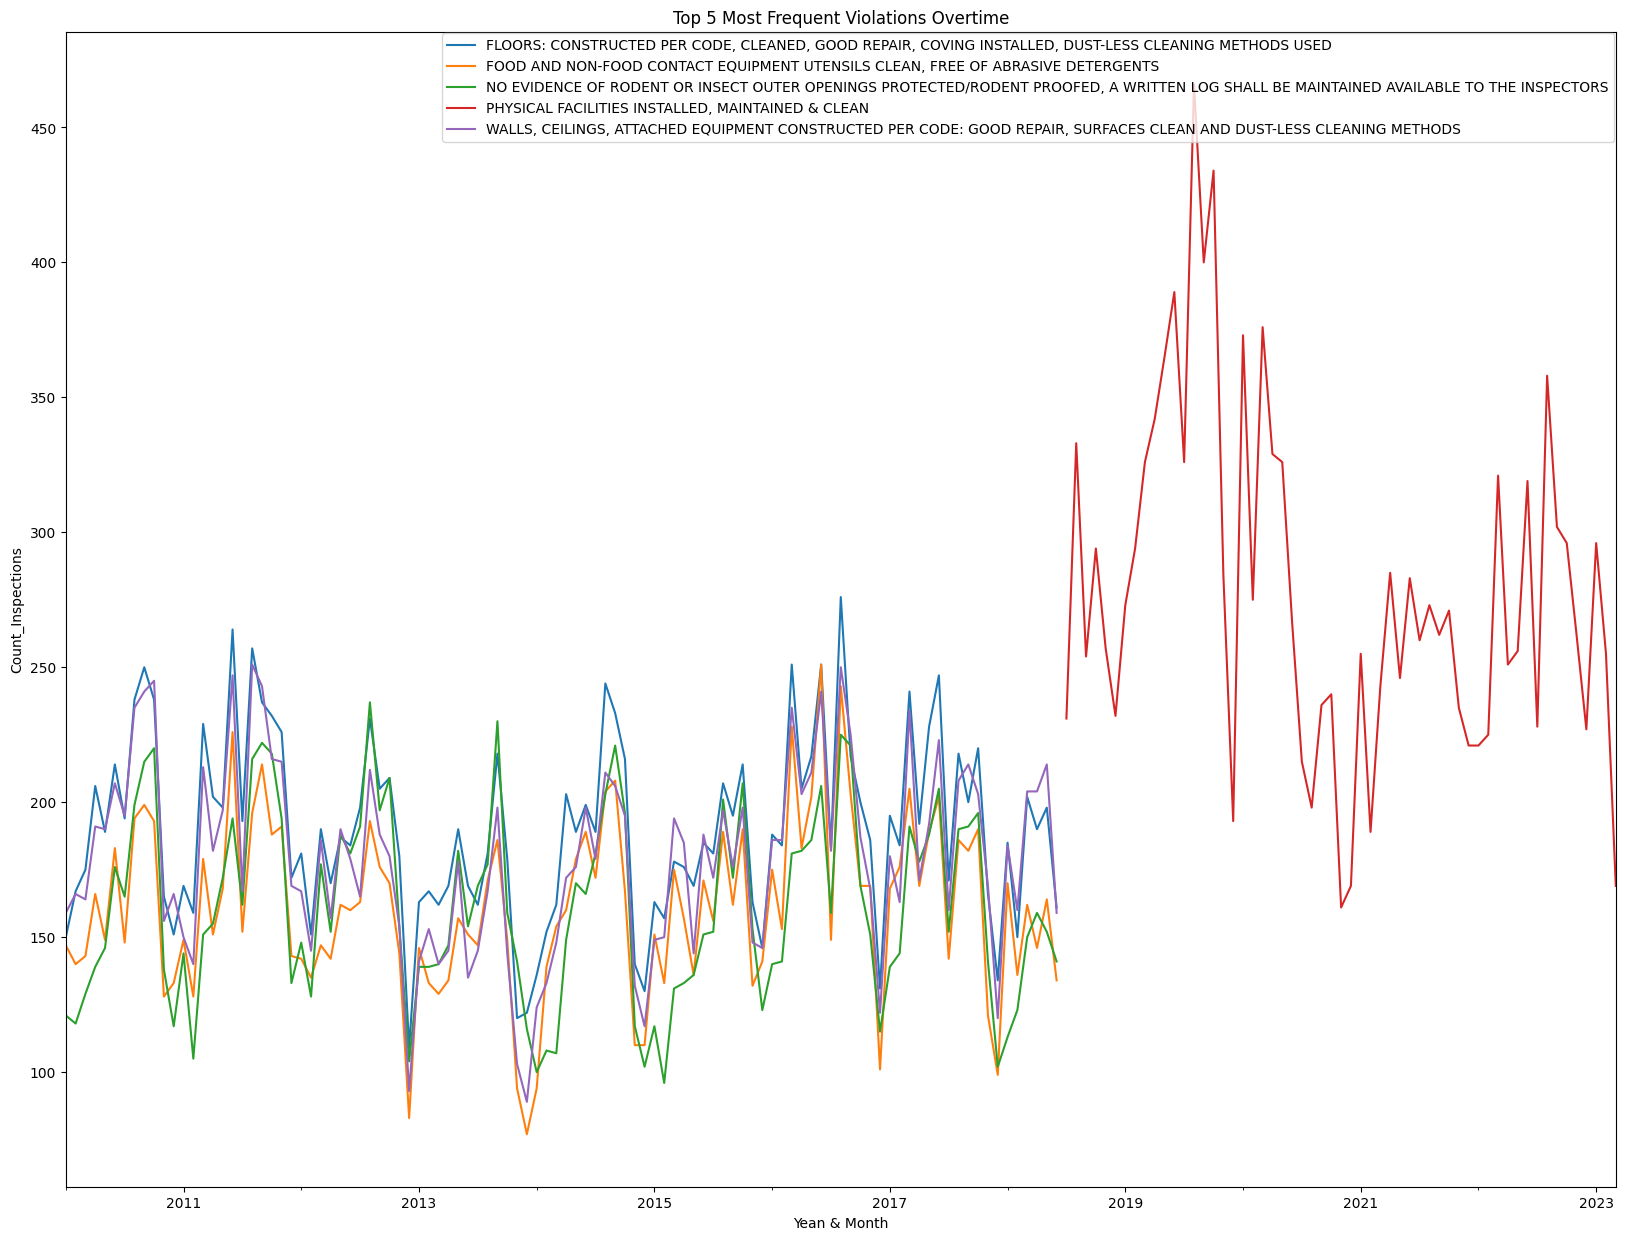

In [340]:
# Generate a line plot for the top-5 violations
df_fail_bytime_my.groupby('Violations_new')["Counts"].plot(legend=True, xlabel = 'Yean & Month', ylabel = 'Count_Inspections')
plt.title("Top 5 Most Frequent Violations Overtime")
plt.legend(loc='best', borderaxespad=0.1)
plt.gcf().set_size_inches(20, 15)

## Q9-Q10

As we can see from the above plot. After 2019, the 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN' Violations has the highest and the only dominant violation category.

However, the other four most common violations were moving under similar trends.

One guess of this pattern is that these violations are highly correlated so they can have very similar moving trends. In addition, the violation 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN' may contain some violations existed in the other four most common violations 